## TRABAJO No. 1
# PERFILES DE BRILLO Y VELOCIDAD DE GALAXIAS

In [22]:
#Primero se importan las librerias necesarias.
import astropy.io.fits as fits 
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

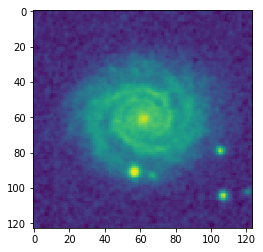

In [3]:
#Visualización de la imagen.
hdu = fits.open("ugc4555_dss.fits")
flux = hdu[0].data
plt.imshow(np.log10(flux),interpolation=None)
header = hdu[0].header

In [4]:
Dx = header['NAXIS1'] # se definen los arraglos deacuerdo a la dimension de la imagen.

In [5]:
Dy = header['NAXIS2']

In [6]:
x =np.arange(Dx)

In [7]:
y =np.arange(Dy)

In [8]:
yy,xx = np.meshgrid(x,y)

In [9]:
xc,yc = (Dx/2)-0.5,(Dy/2)-0.5

In [10]:
R = np.sqrt((xx-xc)**2 + (yy-yc)**2) 

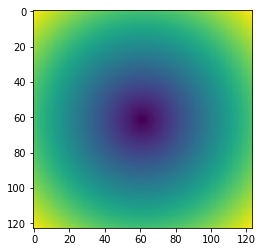

In [11]:
plt.imshow(R,interpolation=None)

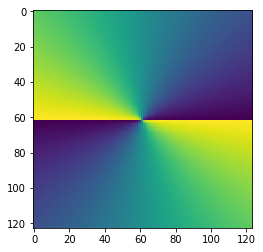

In [12]:
Psi = np.arctan((yy-yc)/(xx-xc))
plt.imshow(Psi,interpolation=None)

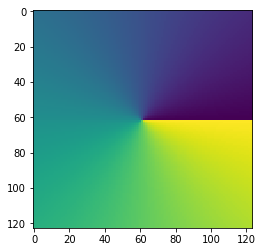

In [59]:
#Ajuste de inclinacion Psi
Psi = np.rad2deg(Psi) + 90
Psi[62:,:] = Psi[62:,:]+180
plt.imshow(Psi,interpolation=None)

 # Se define el parametro $\alpha$ para obtener $r$

In [83]:
alpha= np.sqrt((np.cos(np.deg2rad(Psi-90))**2)+ np.sin(np.deg2rad(Psi-90))**2 / np.cos(np.deg2rad(38)))

In [84]:
r=alpha*R

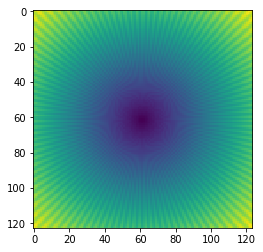

In [85]:
plt.imshow(r,interpolation=None)

In [86]:
theta = np.arccos((R* np.cos(np.deg2rad(Psi)))/(r))

## Grafica perfilde brillo

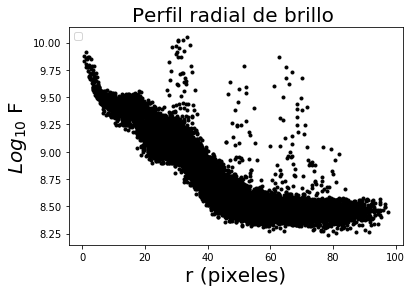

In [103]:
plt.plot(r, np.log(flux), 'k.', linewidth = 0.5)
plt.legend( (''), loc = 'upper left')
plt.xlabel("r (pixeles)", fontsize = 20)
plt.ylabel("$Log_{10}$ F ", fontsize = 20)
plt.title("Perfil radial de brillo ", fontsize = 20)
plt.show()

In [98]:
#eliminando NAN
r = r[~np.isnan(flux)]
flux = flux[~np.isnan(flux)]

Text(0,0.5,'$log_{10}$F')

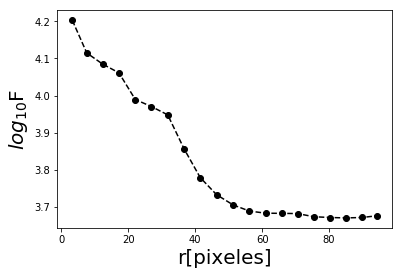

In [105]:
bins = 20
A = np.zeros(bins)
B = np.zeros(bins)
for i in range (0,bins):
    mask = ((i*max(r)/bins)<r)*(r<(i+1)*max(r)/bins)
    A[i] = np.log10(np.mean(flux[mask]))
    B[i] = np.mean(r[mask])
plt.plot(B,A,'ko--')
plt.xlabel(r'r[pixeles]', fontsize=20)
plt.ylabel(r'$log_{10}$F', fontsize=20)